In [1]:
import numpy as np
import os
import sys
import warnings
import time

# Define paths to relevant modules
measure_sampling_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Measure_sampling')
trees_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Trees')
Benchmark_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Benchmark_value_Gausian')
awd_trees_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/AWD_trees')
CD_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Conditional_density')
kmeans_meas_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/Adapted_empirical_measure')
aot_path = os.path.abspath('/Users/rubenbontorno/Documents/Master_Thesis/Code/AWD_numerics/AOT_numerics')

# Add paths to sys.path
for path in [measure_sampling_path, trees_path, Benchmark_path, awd_trees_path, CD_path, kmeans_meas_path, aot_path]:
    if path not in sys.path:
        sys.path.append(path)

from Build_trees_from_paths import *
from Tree_Node import *
from TreeAnalysis import *
from TreeVisualization import *
from Save_Load_trees import *
from Tree_AWD_utilities import *
from Comp_AWD2_Gaussian import build_mean_and_cov, adapted_wasserstein_squared
from Gurobi_AOT import *
from Nested_Dist_Algo import compute_nested_distance
from CD_nonparam import *

from Gen_Path_and_AdaptedTrees import *
from mainfunctions import *
from measure import *
from normal_ot import *
from FVI_bench import *

from Extract_Sample_path_AOT import extract_sample_paths

# Suppress sklearn warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from AEM_kMeans import empirical_k_means_measure, empirical_k_means_measure_new, empirical_k_means_measure_grid
from AEM_grid import empirical_grid_measure

## Checking tree vs Gurobi solver for adapted empirical measure

Method: grid
Time Steps: 6, Method: grid, Run 1/10 for sample size 10...
Set parameter Username
Set parameter LicenseID to value 2604970
Academic license - for non-commercial use only - expires 2026-01-03
Sample Size 10, Run 1: Tree Distance = 141.8367, gurobi Distance = 141.8367, Difference = -0.0000
Sample Size 10, Run 1: Tree Time = 0.0162s, gurobi Time = 0.0701s, Time Diff = -0.0539s
Time Steps: 6, Method: grid, Run 2/10 for sample size 10...
Sample Size 10, Run 2: Tree Distance = 214.3380, gurobi Distance = 214.3380, Difference = -0.0000
Sample Size 10, Run 2: Tree Time = 0.0163s, gurobi Time = 0.0540s, Time Diff = -0.0377s
Time Steps: 6, Method: grid, Run 3/10 for sample size 10...
Sample Size 10, Run 3: Tree Distance = 274.1280, gurobi Distance = 274.1280, Difference = 0.0000
Sample Size 10, Run 3: Tree Time = 0.0150s, gurobi Time = 0.0543s, Time Diff = -0.0392s
Time Steps: 6, Method: grid, Run 4/10 for sample size 10...
Sample Size 10, Run 4: Tree Distance = 97.7663, gurobi Dis

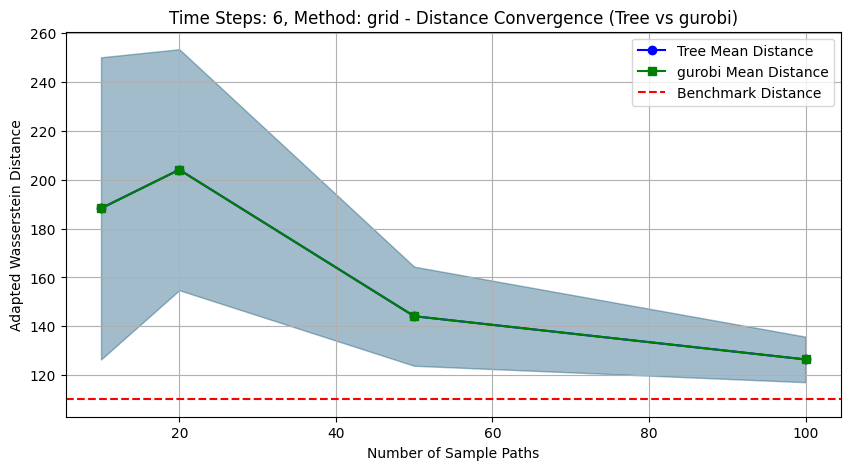

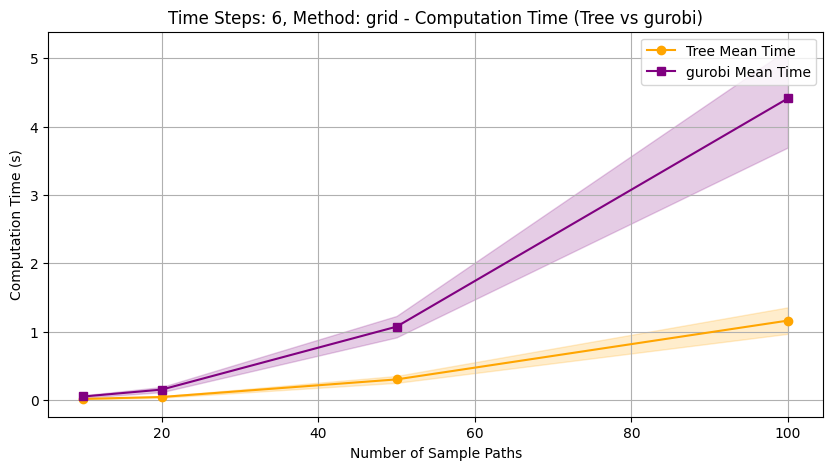

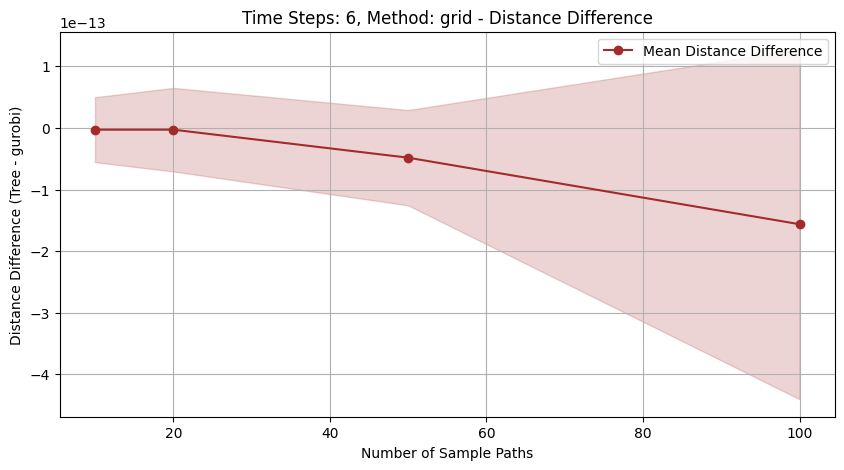

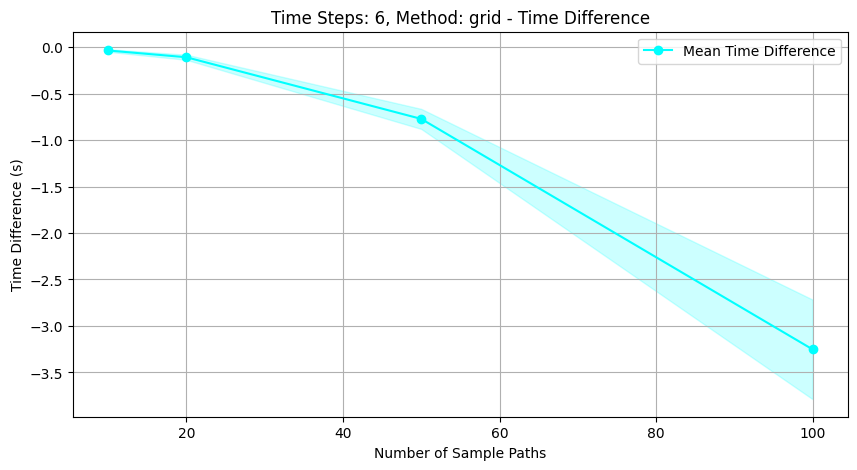

Method: grid
Time Steps: 6, Method: grid, Run 1/10 for sample size 10...
Sample Size 10, Run 1: Tree Distance = 203.8253, gurobi Distance = 203.8253, Difference = -0.0000
Sample Size 10, Run 1: Tree Time = 0.0176s, gurobi Time = 0.0553s, Time Diff = -0.0377s
Time Steps: 6, Method: grid, Run 2/10 for sample size 10...
Sample Size 10, Run 2: Tree Distance = 213.7170, gurobi Distance = 213.7170, Difference = 0.0000
Sample Size 10, Run 2: Tree Time = 0.0117s, gurobi Time = 0.0415s, Time Diff = -0.0298s
Time Steps: 6, Method: grid, Run 3/10 for sample size 10...
Sample Size 10, Run 3: Tree Distance = 227.3102, gurobi Distance = 227.3102, Difference = -0.0000
Sample Size 10, Run 3: Tree Time = 0.0148s, gurobi Time = 0.0514s, Time Diff = -0.0365s
Time Steps: 6, Method: grid, Run 4/10 for sample size 10...
Sample Size 10, Run 4: Tree Distance = 174.9647, gurobi Distance = 174.9647, Difference = 0.0000
Sample Size 10, Run 4: Tree Time = 0.0167s, gurobi Time = 0.0556s, Time Diff = -0.0389s
Time 

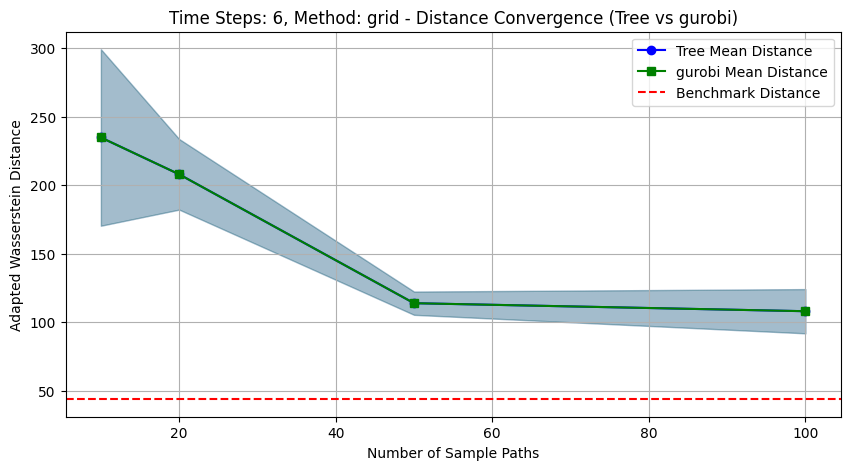

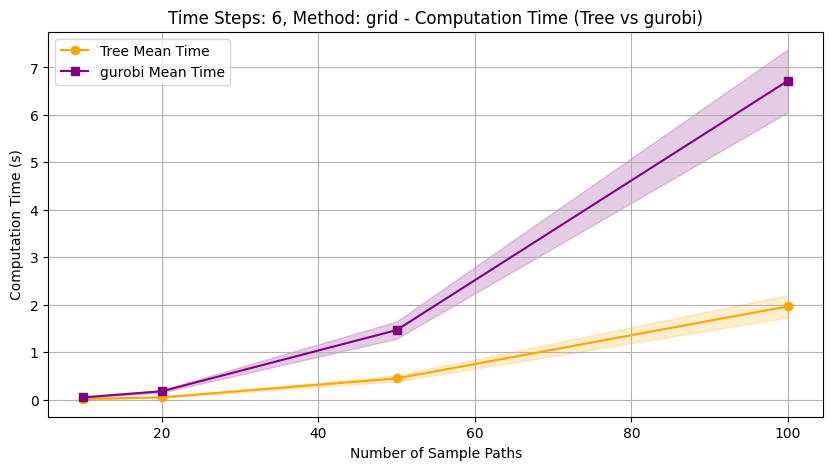

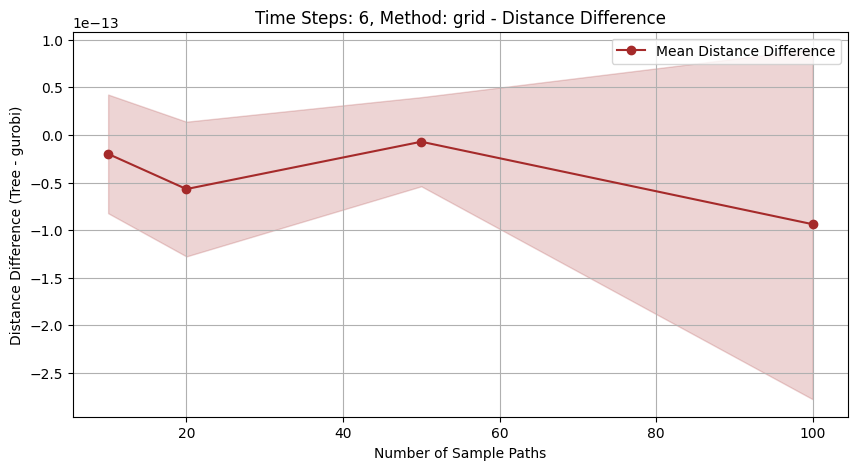

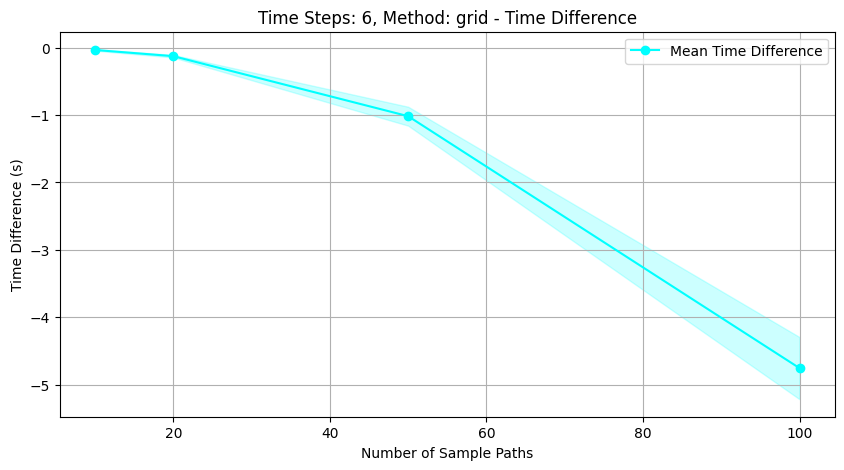

Method: grid
Time Steps: 6, Method: grid, Run 1/10 for sample size 10...
Sample Size 10, Run 1: Tree Distance = 156.0491, gurobi Distance = 156.0491, Difference = 0.0000
Sample Size 10, Run 1: Tree Time = 0.0131s, gurobi Time = 0.0475s, Time Diff = -0.0345s
Time Steps: 6, Method: grid, Run 2/10 for sample size 10...
Sample Size 10, Run 2: Tree Distance = 226.7228, gurobi Distance = 226.7228, Difference = -0.0000
Sample Size 10, Run 2: Tree Time = 0.0176s, gurobi Time = 0.0614s, Time Diff = -0.0439s
Time Steps: 6, Method: grid, Run 3/10 for sample size 10...
Sample Size 10, Run 3: Tree Distance = 181.4342, gurobi Distance = 181.4342, Difference = 0.0000
Sample Size 10, Run 3: Tree Time = 0.0157s, gurobi Time = 0.0561s, Time Diff = -0.0404s
Time Steps: 6, Method: grid, Run 4/10 for sample size 10...
Sample Size 10, Run 4: Tree Distance = 166.4750, gurobi Distance = 166.4750, Difference = 0.0000
Sample Size 10, Run 4: Tree Time = 0.0139s, gurobi Time = 0.0506s, Time Diff = -0.0367s
Time S

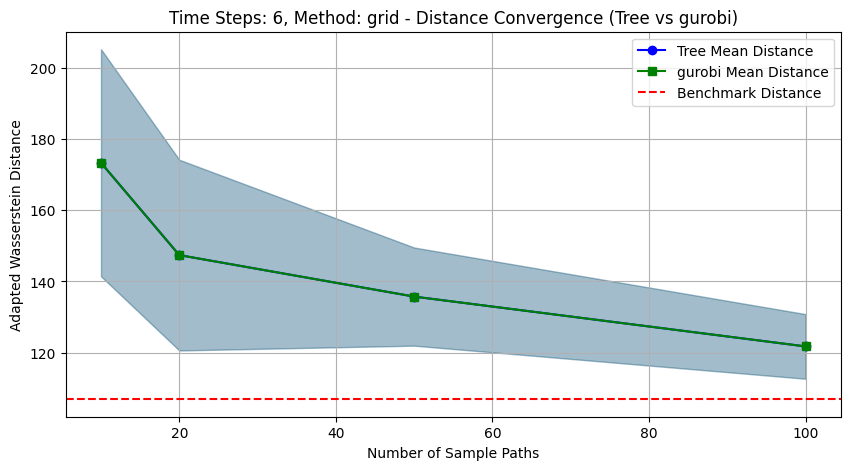

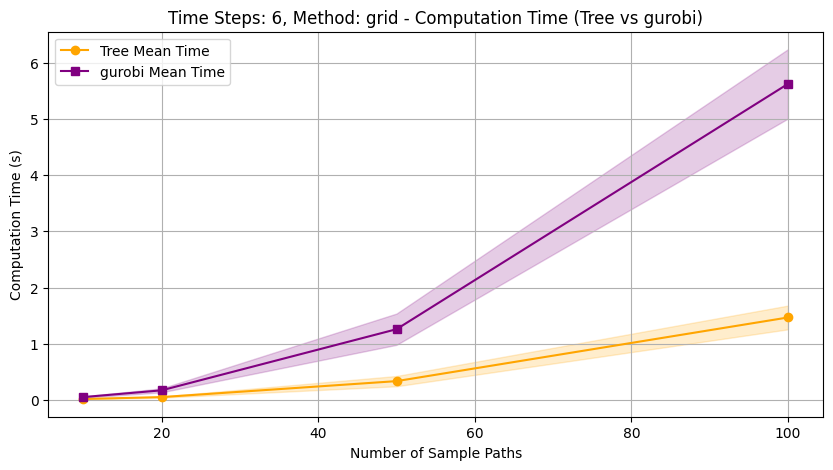

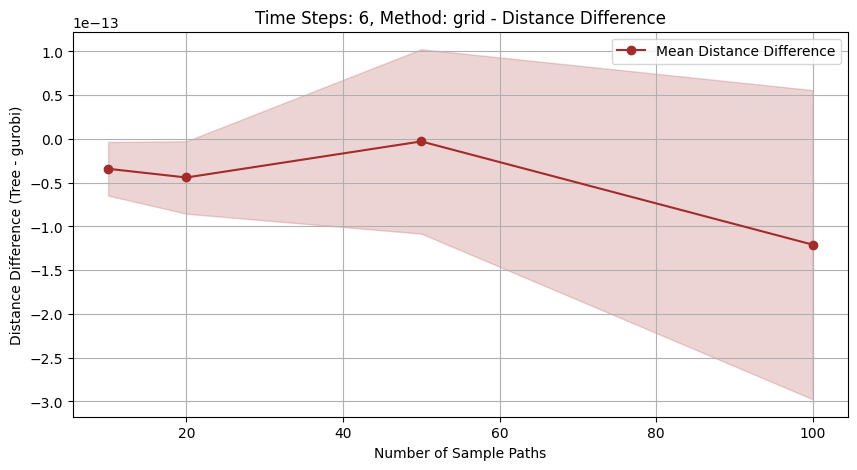

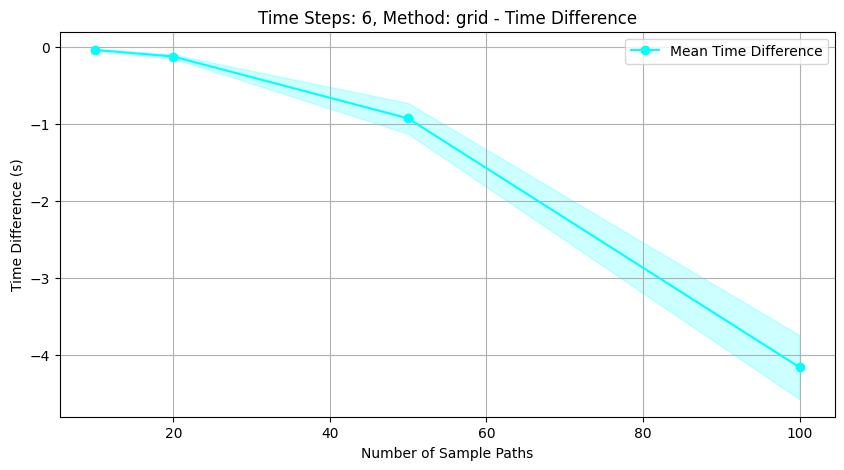

In [2]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

def nearest_pd(A):
    """Find the nearest positive-definite matrix to A."""
    B = (A + A.T) / 2
    _, s, V = np.linalg.svd(B)
    H = V.T @ np.diag(s) @ V
    A2 = (B + H) / 2
    A3 = (A2 + A2.T) / 2
    # Ensure positive definiteness by adding a small identity matrix if needed.
    if is_pd(A3):
        return A3
    spacing = np.spacing(np.linalg.norm(A))
    I = np.eye(A.shape[0])
    k = 0.5
    while not is_pd(A3):
        A3 += I * spacing * k
        k += 1
    return A3

def is_pd(B):
    """Return True if B is positive-definite."""
    try:
        np.linalg.cholesky(B)
        return True
    except np.linalg.LinAlgError:
        return False

Sigma1 = np.array([
    [35,   30,   -3,   2,  -20],
    [30,   35,   3,   -6,   40],
    [-3,    33,   10,    3,   -2],
    [2,     -1.5,    3,    0.5,   0.25],
    [-20,   40,   -2,  0.25, 30]
])
Sigma1 = (Sigma1 + Sigma1.T) / 2  # ensure symmetry

# Covariance Matrix Sigma2:
# - Variances: [25, 5, 16, 3.2, 9] corresponding to std devs: 5, ~2.24, 4, ~1.79, 3.
# - Sparse, extreme off-diagonals: a strong negative tie between X1 and X3 and smaller interactions elsewhere.
Sigma2 = np.array([
    [25,    0,   -20,    0,    1.5],
    [0,     5,     0,  -0.4,    0],
    [-20,   0,    16,    0,   -1.2],
    [0,   -0.4,    0,   3.2,    0],
    [1.5,   0,   -1.2,    0,    9]
])
Sigma2 = (Sigma2 + Sigma2.T) / 2  # ensure symmetry


Sigma3 = np.array([
    [30,   15,    5,   10,  -20],
    [15,   25,   12,   -8,    5],
    [5,    12,   20,    7,   -3],
    [10,   -8,    7,   10,    4],
    [-20,   5,   -3,    4,   30]
])
Sigma3 = (Sigma3 + Sigma3.T) / 2  # ensure symmetry


# Adjust the covariance matrices to be positive-definite.
sigma1_pd = nearest_pd(Sigma1)
sigma2_pd = nearest_pd(Sigma2)
sigma3_pd = nearest_pd(Sigma3)



# Mean vector (zero for both)
mean = np.zeros(5)

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define the methods and time steps to loop over
method = "grid"
time_steps_list = [6]
n_runs = 10

# Define sample path sizes for each time step
sample_sizes = [10, 20, 50, 100]

# Prepare arrays for storing tree and gurobi results
distances_all_tree = np.zeros((len(sample_sizes), n_runs))
times_all_tree = np.zeros((len(sample_sizes), n_runs))
distances_all_gurobi = np.zeros((len(sample_sizes), n_runs))
times_all_gurobi = np.zeros((len(sample_sizes), n_runs))
diff_distance_all = np.zeros((len(sample_sizes), n_runs))
diff_time_all = np.zeros((len(sample_sizes), n_runs))

# Loop over each time step and method combination
for time_steps in time_steps_list:
    for value in [1,2,3]:
        Sigma_A = 0
        Sigma_B = 0
        if value == 1:
            Sigma_A = sigma1_pd
            Sigma_B = sigma2_pd
        elif value == 2:
            Sigma_A = sigma1_pd
            Sigma_B = sigma3_pd
        elif value == 3:
            Sigma_A = sigma2_pd
            Sigma_B = sigma3_pd

        print("Method:", method)
        # distance_squared is used as a benchmark
        distance_squared = adapted_wasserstein_squared(mean, Sigma_A, mean, Sigma_B)
        
        # Loop over each sample size and run n_runs for statistics
        for i, num_paths in enumerate(sample_sizes):
            for run_idx in range(n_runs):
                print(f"Time Steps: {time_steps}, Method: {method}, Run {run_idx+1}/{n_runs} for sample size {num_paths}...")

                # Generate samples for both measures
                samplesA = np.random.multivariate_normal(mean, Sigma_A, size=num_paths)
                samplesB = np.random.multivariate_normal(mean, Sigma_B, size=num_paths)
                samplesA_with_zero = np.hstack([np.zeros((num_paths, 1)), samplesA])
                samplesB_with_zero = np.hstack([np.zeros((num_paths, 1)), samplesB])

                # Compute the empirical grid measures (paths and weights)
                new_sample_pathsA, new_weightsA = empirical_grid_measure(samplesA_with_zero, use_weights=True)
                new_sample_pathsB, new_weightsB = empirical_grid_measure(samplesB_with_zero, use_weights=True)

                
                
                # ---------------------------
                # Build representations:
                # ---------------------------
                # (A) Tree-based construction:
                tree1 = build_tree_from_paths(new_sample_pathsA, new_weightsA)
                tree2 = build_tree_from_paths(new_sample_pathsB, new_weightsB)
                
                formatedA = [new_sample_pathsA, new_weightsA]
                formatedB = [new_sample_pathsB, new_weightsB]
                
                # ---------------------------
                # Compute nested distance using the tree:
                # ---------------------------
                max_depth_tree = get_depth(tree2)
                start_time_tree = time.time()
                distance_tree = compute_nested_distance(
                    tree1, tree2, max_depth_tree, 
                    method="solver_lp_pot", 
                    return_matrix=False, 
                    lambda_reg=0, 
                    power=2
                )
                elapsed_time_tree = time.time() - start_time_tree

                # ---------------------------
                # Compute nested distance using gurobi_bm:
                # ---------------------------

                def cost_function(x, y):
                    """Cost function: L1 distance."""
                    return np.sum(np.abs(x - y)**2)
            
                start_time_gurobi = time.time()
                distance_gurobi = gurobi_bm(
                [formatedA, formatedB],
                f=cost_function,
                r_opti=0,
                causal=1,
                anticausal=1,
                outputflag=0
                )

                elapsed_time_gurobi = time.time() - start_time_gurobi
                
                # (Optional) Adjust distance by subtracting any constant if needed:
                distance_tree -= (0 - 0) ** 2
                distance_gurobi -= (0 - 0) ** 2
                
                # Store the computed distances and computation times:
                distances_all_tree[i, run_idx] = distance_tree
                times_all_tree[i, run_idx] = elapsed_time_tree
                distances_all_gurobi[i, run_idx] = distance_gurobi
                times_all_gurobi[i, run_idx] = elapsed_time_gurobi
                
                # Also store the differences (tree - gurobi)
                diff_distance_all[i, run_idx] = distance_tree - distance_gurobi
                diff_time_all[i, run_idx] = elapsed_time_tree - elapsed_time_gurobi
                
                print(f"Sample Size {num_paths}, Run {run_idx+1}: Tree Distance = {distance_tree:.4f}, gurobi Distance = {distance_gurobi:.4f}, Difference = {distance_tree - distance_gurobi:.4f}")
                print(f"Sample Size {num_paths}, Run {run_idx+1}: Tree Time = {elapsed_time_tree:.4f}s, gurobi Time = {elapsed_time_gurobi:.4f}s, Time Diff = {elapsed_time_tree - elapsed_time_gurobi:.4f}s")

        # ---------------------------
        # Compute statistics over runs:
        # ---------------------------
        # Tree statistics:
        distances_tree_mean = distances_all_tree.mean(axis=1)
        distances_tree_std = distances_all_tree.std(axis=1)
        times_tree_mean = times_all_tree.mean(axis=1)
        times_tree_std = times_all_tree.std(axis=1)
        # gurobi statistics:
        distances_gurobi_mean = distances_all_gurobi.mean(axis=1)
        distances_gurobi_std = distances_all_gurobi.std(axis=1)
        times_gurobi_mean = times_all_gurobi.mean(axis=1)
        times_gurobi_std = times_all_gurobi.std(axis=1)
        # Difference statistics:
        diff_distance_mean = diff_distance_all.mean(axis=1)
        diff_distance_std = diff_distance_all.std(axis=1)
        diff_time_mean = diff_time_all.mean(axis=1)
        diff_time_std = diff_time_all.std(axis=1)
        
        # ---------------------------
        # PLOTTING
        # ---------------------------
        # Plot 1: Distance convergence for Tree vs. gurobi
        plt.figure(figsize=(10, 5))
        plt.plot(sample_sizes, distances_tree_mean, marker="o", color="blue", label="Tree Mean Distance")
        plt.plot(sample_sizes, distances_gurobi_mean, marker="s", color="green", label="gurobi Mean Distance")
        plt.fill_between(sample_sizes, distances_tree_mean - distances_tree_std, distances_tree_mean + distances_tree_std, color="blue", alpha=0.2)
        plt.fill_between(sample_sizes, distances_gurobi_mean - distances_gurobi_std, distances_gurobi_mean + distances_gurobi_std, color="green", alpha=0.2)
        plt.axhline(y=distance_squared, color="red", linestyle="--", label="Benchmark Distance")
        plt.xlabel("Number of Sample Paths")
        plt.ylabel("Adapted Wasserstein Distance")
        plt.title(f"Time Steps: {time_steps}, Method: {method} - Distance Convergence (Tree vs gurobi)")
        plt.legend()
        plt.grid()
        plt.show()
        
        # Plot 2: Computation Time for Tree vs. gurobi
        plt.figure(figsize=(10, 5))
        plt.plot(sample_sizes, times_tree_mean, marker="o", color="orange", label="Tree Mean Time")
        plt.plot(sample_sizes, times_gurobi_mean, marker="s", color="purple", label="gurobi Mean Time")
        plt.fill_between(sample_sizes, times_tree_mean - times_tree_std, times_tree_mean + times_tree_std, color="orange", alpha=0.2)
        plt.fill_between(sample_sizes, times_gurobi_mean - times_gurobi_std, times_gurobi_mean + times_gurobi_std, color="purple", alpha=0.2)
        plt.xlabel("Number of Sample Paths")
        plt.ylabel("Computation Time (s)")
        plt.title(f"Time Steps: {time_steps}, Method: {method} - Computation Time (Tree vs gurobi)")
        plt.legend()
        plt.grid()
        plt.show()
        
        # Plot 3: Difference in Distance (Tree - gurobi)
        plt.figure(figsize=(10, 5))
        plt.plot(sample_sizes, diff_distance_mean, marker="o", color="brown", label="Mean Distance Difference")
        plt.fill_between(sample_sizes, diff_distance_mean - diff_distance_std, diff_distance_mean + diff_distance_std, color="brown", alpha=0.2)
        plt.xlabel("Number of Sample Paths")
        plt.ylabel("Distance Difference (Tree - gurobi)")
        plt.title(f"Time Steps: {time_steps}, Method: {method} - Distance Difference")
        plt.legend()
        plt.grid()
        plt.show()
        
        # Plot 4: Difference in Computation Time (Tree - gurobi)
        plt.figure(figsize=(10, 5))
        plt.plot(sample_sizes, diff_time_mean, marker="o", color="cyan", label="Mean Time Difference")
        plt.fill_between(sample_sizes, diff_time_mean - diff_time_std, diff_time_mean + diff_time_std, color="cyan", alpha=0.2)
        plt.xlabel("Number of Sample Paths")
        plt.ylabel("Time Difference (s)")
        plt.title(f"Time Steps: {time_steps}, Method: {method} - Time Difference")
        plt.legend()
        plt.grid()
        plt.show()


## Doing the same as above but with more explicit non-markovian process

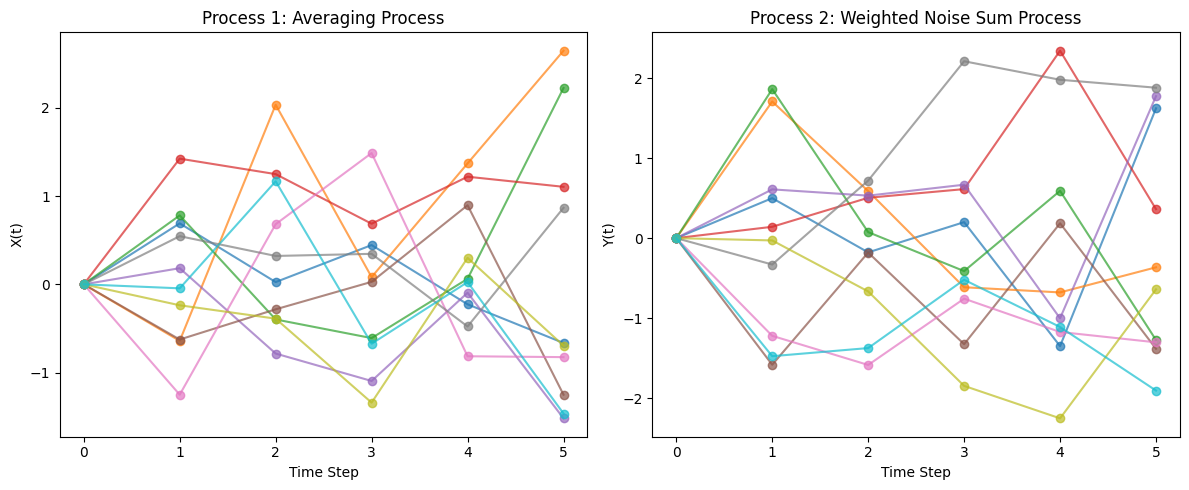

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
num_paths = 200  # number of sample paths
T = 6            # number of time steps (including t=0)
sigma = 1.0      # standard deviation for noise

# Process 1: Averaging process (update depends on the full past average)
# This is non-Markovian since the update at time t uses the mean of all previous values.
X = np.zeros((num_paths, T))
for i in range(num_paths):
    X[i, 0] = 0  # initial value
    for t in range(1, T):
        past_mean = np.mean(X[i, :t])
        X[i, t] = past_mean + np.random.normal(0, sigma)

# Process 2: Weighted noise sum process (each step is a weighted sum of all past noise)
# The weights are chosen as 1/(lag) so that the contribution of past noise is non-negligible.
Y = np.zeros((num_paths, T))
for i in range(num_paths):
    # Generate a sequence of independent noise values for this sample path
    noise = np.random.normal(0, sigma, T)
    Y[i, 0] = 0  # initial value
    for t in range(1, T):
        weighted_sum = 0
        for s in range(t):
            # weight decreases with the lag; note that for s = t-1 the weight is 1.
            weight = 1 / (t - s)
            weighted_sum += weight * noise[s]
        Y[i, t] = weighted_sum

# Optional: Plot a few sample paths from each process
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in range(10):  # plot 10 sample paths for clarity
    plt.plot(range(T), X[i, :], marker='o', alpha=0.7)
plt.title('Process 1: Averaging Process')
plt.xlabel('Time Step')
plt.ylabel('X(t)')

plt.subplot(1, 2, 2)
for i in range(10):
    plt.plot(range(T), Y[i, :], marker='o', alpha=0.7)
plt.title('Process 2: Weighted Noise Sum Process')
plt.xlabel('Time Step')
plt.ylabel('Y(t)')

plt.tight_layout()
plt.show()


Method: grid
Time Steps: 6, Method: grid, Run 1/10 for sample size 10...
Sample Size 10, Run 1: Tree Distance = 9.6616, gurobi Distance = 9.6616, Difference = 0.0000
Sample Size 10, Run 1: Tree Time = 0.0248s, gurobi Time = 0.0792s, Time Diff = -0.0544s
Time Steps: 6, Method: grid, Run 2/10 for sample size 10...
Sample Size 10, Run 2: Tree Distance = 16.8163, gurobi Distance = 16.8163, Difference = 0.0000
Sample Size 10, Run 2: Tree Time = 0.0220s, gurobi Time = 0.0764s, Time Diff = -0.0545s
Time Steps: 6, Method: grid, Run 3/10 for sample size 10...
Sample Size 10, Run 3: Tree Distance = 12.4162, gurobi Distance = 12.4162, Difference = -0.0000
Sample Size 10, Run 3: Tree Time = 0.0143s, gurobi Time = 0.0509s, Time Diff = -0.0366s
Time Steps: 6, Method: grid, Run 4/10 for sample size 10...
Sample Size 10, Run 4: Tree Distance = 16.6544, gurobi Distance = 16.6544, Difference = -0.0000
Sample Size 10, Run 4: Tree Time = 0.0164s, gurobi Time = 0.0604s, Time Diff = -0.0440s
Time Steps: 6, 

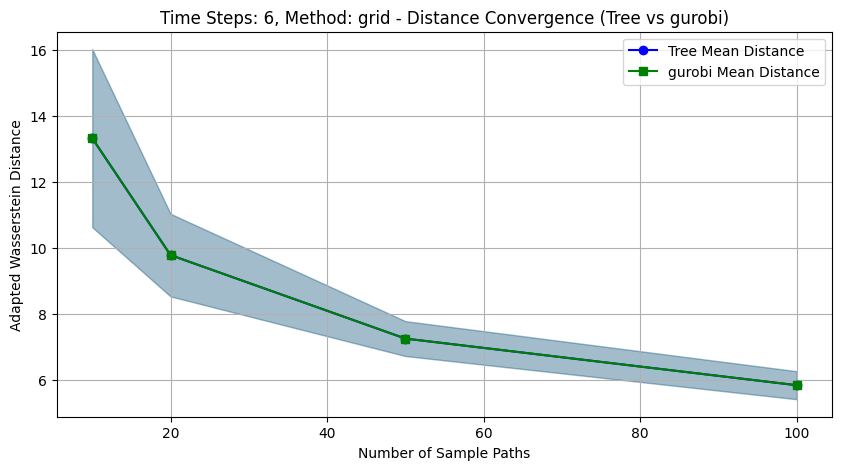

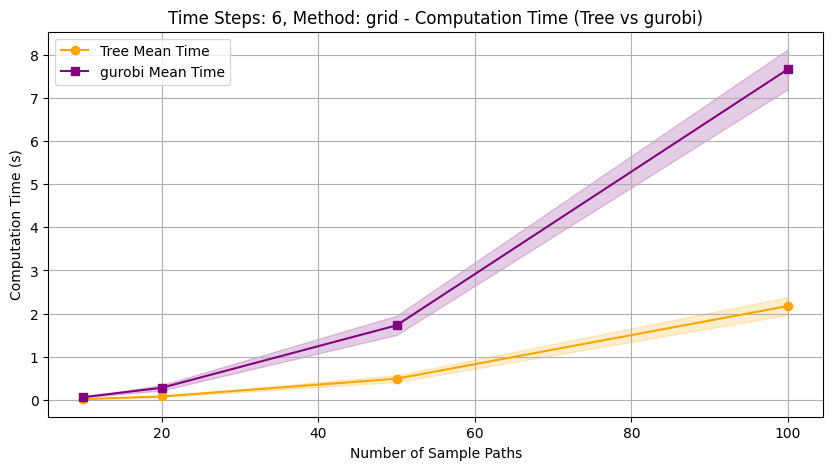

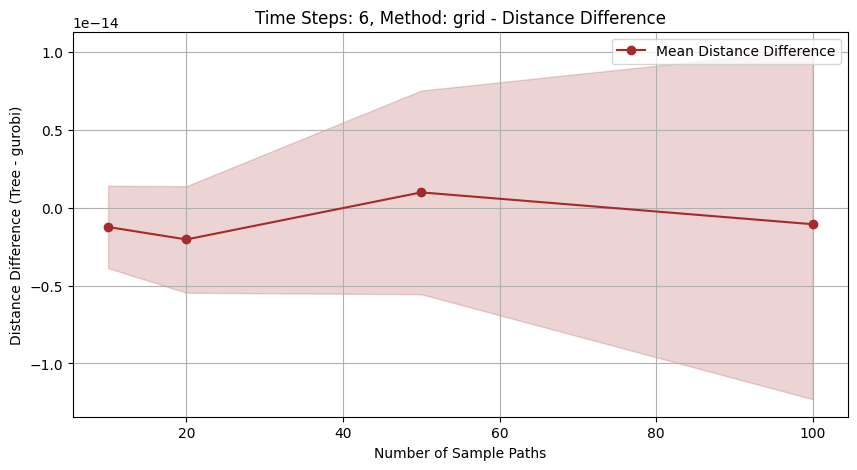

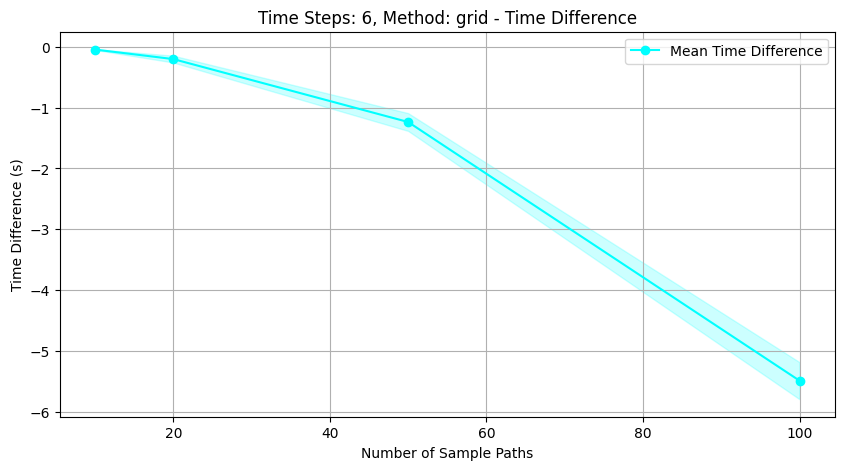

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define the method and time steps to loop over
method = "grid"
time_steps_list = [6]  # total number of time steps (including t=0)
n_runs = 10

# Define sample path sizes for each time step
sample_sizes = [10, 20, 50, 100]

# Prepare arrays for storing tree and gurobi results
distances_all_tree = np.zeros((len(sample_sizes), n_runs))
times_all_tree = np.zeros((len(sample_sizes), n_runs))
distances_all_gurobi = np.zeros((len(sample_sizes), n_runs))
times_all_gurobi = np.zeros((len(sample_sizes), n_runs))
diff_distance_all = np.zeros((len(sample_sizes), n_runs))
diff_time_all = np.zeros((len(sample_sizes), n_runs))

distance_benchmark = np.nan

# Noise standard deviation used in the two processes
sigma = 1.0

# Loop over each time step and method combination
for time_steps in time_steps_list:
    print("Method:", method)
    
    # Loop over each sample size and run multiple trials for statistics
    for i, num_paths in enumerate(sample_sizes):
        for run_idx in range(n_runs):
            print(f"Time Steps: {time_steps}, Method: {method}, Run {run_idx+1}/{n_runs} for sample size {num_paths}...")
            
            T = time_steps  # number of time steps (assumes t=0 is included)
            
            # ---------------------------
            # Generate non-Markovian sample paths:
            # ---------------------------
            # Process 1: Averaging Process (update uses the full past)
            samplesA = np.zeros((num_paths, T))
            for j in range(num_paths):
                samplesA[j, 0] = 0  # initial condition
                for t in range(1, T):
                    past_mean = np.mean(samplesA[j, :t])
                    samplesA[j, t] = past_mean + np.random.normal(0, sigma)
            
            # Process 2: Weighted Noise Sum Process (each step is a weighted sum of past noise)
            samplesB = np.zeros((num_paths, T))
            for j in range(num_paths):
                # Generate a noise sequence for this sample path
                noise = np.random.normal(0, sigma, T)
                samplesB[j, 0] = 0  # initial condition
                for t in range(1, T):
                    weighted_sum = 0
                    for s in range(t):
                        weight = 1 / (t - s)
                        weighted_sum += weight * noise[s]
                    samplesB[j, t] = weighted_sum
            
            # here we assume that the processes already start at zero.)
            samplesA_with_zero = samplesA  
            samplesB_with_zero = samplesB  
            
            # ---------------------------
            # Compute the empirical grid measures (paths and weights)
            # ---------------------------
            new_sample_pathsA, new_weightsA = empirical_grid_measure(samplesA_with_zero, use_weights=True)
            new_sample_pathsB, new_weightsB = empirical_grid_measure(samplesB_with_zero, use_weights=True)
            
            # ---------------------------
            # Build tree/gurobi representations:
            # ---------------------------
            tree1 = build_tree_from_paths(new_sample_pathsA, new_weightsA)
            tree2 = build_tree_from_paths(new_sample_pathsB, new_weightsB)
            
            formatedA = [new_sample_pathsA, new_weightsA]
            formatedB = [new_sample_pathsB, new_weightsB]
            
            # ---------------------------
            # Compute nested distance using the tree:
            # ---------------------------
            max_depth_tree = get_depth(tree2)
            start_time_tree = time.time()
            distance_tree = compute_nested_distance(
                tree1, tree2, max_depth_tree, 
                method="solver_lp_pot", 
                return_matrix=False, 
                lambda_reg=0, 
                power=2
            )
            elapsed_time_tree = time.time() - start_time_tree
            
            # ---------------------------
            # Compute nested distance using the gurobi:
            # ---------------------------
            def cost_function(x, y):
                """Cost function: L1 distance squared."""
                return np.sum(np.abs(x - y)**2)
            
            start_time_gurobi = time.time()
            distance_gurobi = gurobi_bm(
                [formatedA, formatedB],
                f=cost_function,
                r_opti=0,
                causal=1,
                anticausal=1,
                outputflag=0
            )
            elapsed_time_gurobi = time.time() - start_time_gurobi
            
            # (Optional) Adjust the computed distances by subtracting any constant (here, 0)
            distance_tree -= (0 - 0) ** 2
            distance_gurobi -= (0 - 0) ** 2
            
            # Store the computed distances and computation times:
            distances_all_tree[i, run_idx] = distance_tree
            times_all_tree[i, run_idx] = elapsed_time_tree
            distances_all_gurobi[i, run_idx] = distance_gurobi
            times_all_gurobi[i, run_idx] = elapsed_time_gurobi
            
            # Also store the differences (tree - gurobi)
            diff_distance_all[i, run_idx] = distance_tree - distance_gurobi
            diff_time_all[i, run_idx] = elapsed_time_tree - elapsed_time_gurobi
            
            print(f"Sample Size {num_paths}, Run {run_idx+1}: Tree Distance = {distance_tree:.4f}, gurobi Distance = {distance_gurobi:.4f}, Difference = {distance_tree - distance_gurobi:.4f}")
            print(f"Sample Size {num_paths}, Run {run_idx+1}: Tree Time = {elapsed_time_tree:.4f}s, gurobi Time = {elapsed_time_gurobi:.4f}s, Time Diff = {elapsed_time_tree - elapsed_time_gurobi:.4f}s")

    # ---------------------------
    # Compute statistics over runs:
    # ---------------------------
    # Tree statistics:
    distances_tree_mean = distances_all_tree.mean(axis=1)
    distances_tree_std = distances_all_tree.std(axis=1)
    times_tree_mean = times_all_tree.mean(axis=1)
    times_tree_std = times_all_tree.std(axis=1)
    # gurobi statistics:
    distances_gurobi_mean = distances_all_gurobi.mean(axis=1)
    distances_gurobi_std = distances_all_gurobi.std(axis=1)
    times_gurobi_mean = times_all_gurobi.mean(axis=1)
    times_gurobi_std = times_all_gurobi.std(axis=1)
    # Difference statistics:
    diff_distance_mean = diff_distance_all.mean(axis=1)
    diff_distance_std = diff_distance_all.std(axis=1)
    diff_time_mean = diff_time_all.mean(axis=1)
    diff_time_std = diff_time_all.std(axis=1)
    
    # ---------------------------
    # PLOTTING
    # ---------------------------
    # Plot 1: Distance convergence for Tree vs. gurobi
    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, distances_tree_mean, marker="o", color="blue", label="Tree Mean Distance")
    plt.plot(sample_sizes, distances_gurobi_mean, marker="s", color="green", label="gurobi Mean Distance")
    plt.fill_between(sample_sizes, distances_tree_mean - distances_tree_std, distances_tree_mean + distances_tree_std, color="blue", alpha=0.2)
    plt.fill_between(sample_sizes, distances_gurobi_mean - distances_gurobi_std, distances_gurobi_mean + distances_gurobi_std, color="green", alpha=0.2)
    if not np.isnan(distance_benchmark):
        plt.axhline(y=distance_benchmark, color="red", linestyle="--", label="Benchmark Distance")
    plt.xlabel("Number of Sample Paths")
    plt.ylabel("Adapted Wasserstein Distance")
    plt.title(f"Time Steps: {time_steps}, Method: {method} - Distance Convergence (Tree vs gurobi)")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot 2: Computation Time for Tree vs. gurobi
    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, times_tree_mean, marker="o", color="orange", label="Tree Mean Time")
    plt.plot(sample_sizes, times_gurobi_mean, marker="s", color="purple", label="gurobi Mean Time")
    plt.fill_between(sample_sizes, times_tree_mean - times_tree_std, times_tree_mean + times_tree_std, color="orange", alpha=0.2)
    plt.fill_between(sample_sizes, times_gurobi_mean - times_gurobi_std, times_gurobi_mean + times_gurobi_std, color="purple", alpha=0.2)
    plt.xlabel("Number of Sample Paths")
    plt.ylabel("Computation Time (s)")
    plt.title(f"Time Steps: {time_steps}, Method: {method} - Computation Time (Tree vs gurobi)")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot 3: Difference in Distance (Tree - gurobi)
    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, diff_distance_mean, marker="o", color="brown", label="Mean Distance Difference")
    plt.fill_between(sample_sizes, diff_distance_mean - diff_distance_std, diff_distance_mean + diff_distance_std, color="brown", alpha=0.2)
    plt.xlabel("Number of Sample Paths")
    plt.ylabel("Distance Difference (Tree - gurobi)")
    plt.title(f"Time Steps: {time_steps}, Method: {method} - Distance Difference")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot 4: Difference in Computation Time (Tree - gurobi)
    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, diff_time_mean, marker="o", color="cyan", label="Mean Time Difference")
    plt.fill_between(sample_sizes, diff_time_mean - diff_time_std, diff_time_mean + diff_time_std, color="cyan", alpha=0.2)
    plt.xlabel("Number of Sample Paths")
    plt.ylabel("Time Difference (s)")
    plt.title(f"Time Steps: {time_steps}, Method: {method} - Time Difference")
    plt.legend()
    plt.grid()
    plt.show()


## checking if indeed my build_tree_from_paths follow the backward rule presented in the email

In [6]:
def build_tree_from_paths_backward(sample_paths, weights):
    """
    Builds a weighted tree from sample paths using an explicit backward computation.

    Parameters:
      - sample_paths (list of lists): Each inner list represents a path (e.g. [10, 13, 14, 15]).
      - weights (list of floats): The weight corresponding to each sample path.
      
    Returns:
      - TreeNode: The root of the constructed tree.
      
    Raises:
      - ValueError: If sample paths don't all start with the same value,
                    if sample paths have different lengths,
                    or if the sum of weights is not equal to 1.
    """

    # Check that all sample paths start with the same value.
    start_value = sample_paths[0][0]
    for path in sample_paths:
        if path[0] != start_value:
            raise ValueError("All sample paths must have the same value at time step 0.")

    # Check that all sample paths have the same length.
    L = len(sample_paths[0])
    for path in sample_paths:
        if len(path) != L:
            raise ValueError("All sample paths must have the same length.")

    # Check that the sum of weights equals 1.
    total_weight = sum(weights)
    if abs(total_weight - 1.0) > 1e-6:
        raise ValueError("The sum of weights must equal 1. Got sum(weights) = {}".format(total_weight))

    # Create a mapping from prefix (tuple) to (TreeNode, aggregated weight).
    # Start at the leaves: each full sample path defines a leaf node.
    node_info = {}
    for path, w in zip(sample_paths, weights):
        prefix = tuple(path)
        if prefix not in node_info:
            node_info[prefix] = [TreeNode(path[-1]), 0.0]
        node_info[prefix][1] += w

    # Process backwards from the second-to-last index down to 0.
    # At each time step t, group sample paths by their prefix of length t+1.
    for t in range(L - 2, -1, -1):
        new_node_info = {}
        # Process each sample path along with its weight.
        for path, w in zip(sample_paths, weights):
            prefix = tuple(path[:t+1])
            child_prefix = tuple(path[:t+2])
            # Retrieve the child node from the previous iteration.
            child_node, _ = node_info[child_prefix]
            # If we haven't created a node for this prefix, do so now.
            if prefix not in new_node_info:
                # Third element is a temporary dictionary to aggregate children info.
                new_node_info[prefix] = [TreeNode(path[t]), 0.0, {}]
            # Update the parent's aggregated weight.
            new_node_info[prefix][1] += w
            # Update children info: accumulate the weight for this particular child.
            children_info = new_node_info[prefix][2]
            if child_node.value not in children_info:
                children_info[child_node.value] = [child_node, 0.0]
            children_info[child_node.value][1] += w

        # Attach children to each new parent node, normalizing the transition probabilities.
        for prefix, (node, total_w, children_info) in new_node_info.items():
            for child_val, (child_node, trans_w) in children_info.items():
                probability = trans_w / total_w if total_w > 0 else 0
                node.add_child(child_node, probability)
            # Replace with just the (node, total_weight) pair.
            new_node_info[prefix] = [node, total_w]

        # Update the node_info mapping for the next iteration.
        node_info = {k: (v[0], v[1]) for k, v in new_node_info.items()}

    # The root node is associated with the prefix containing only the start value.
    return node_info[(start_value,)][0]


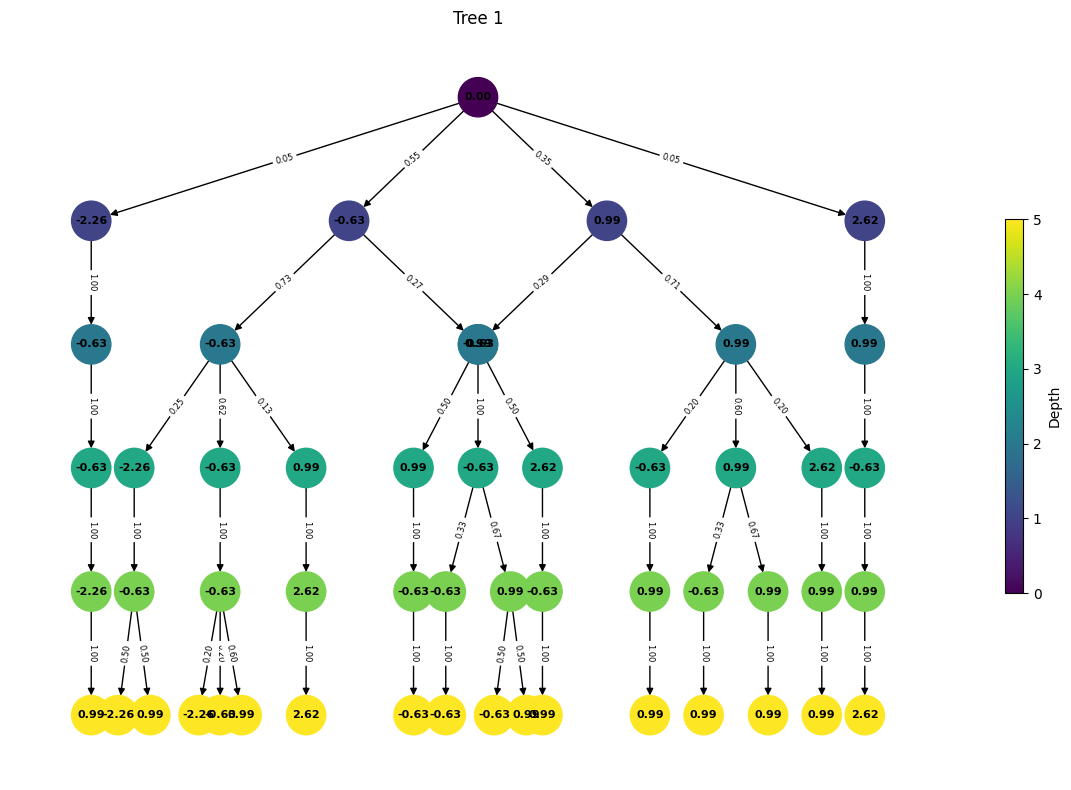

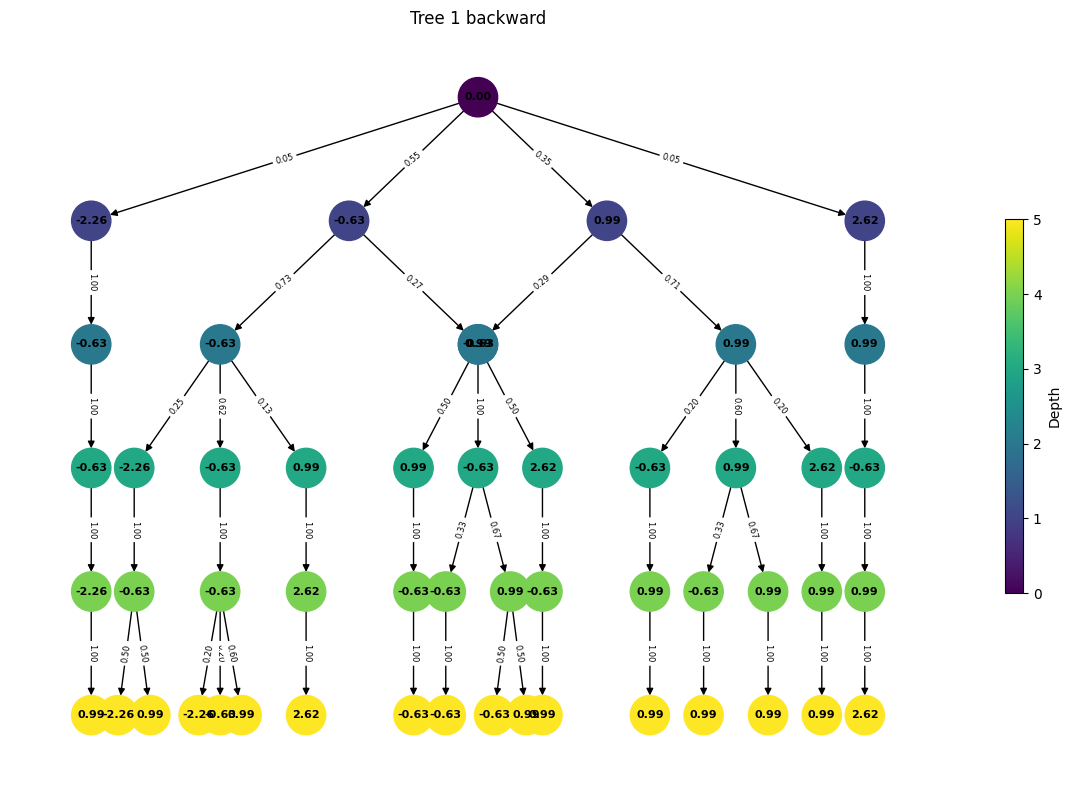

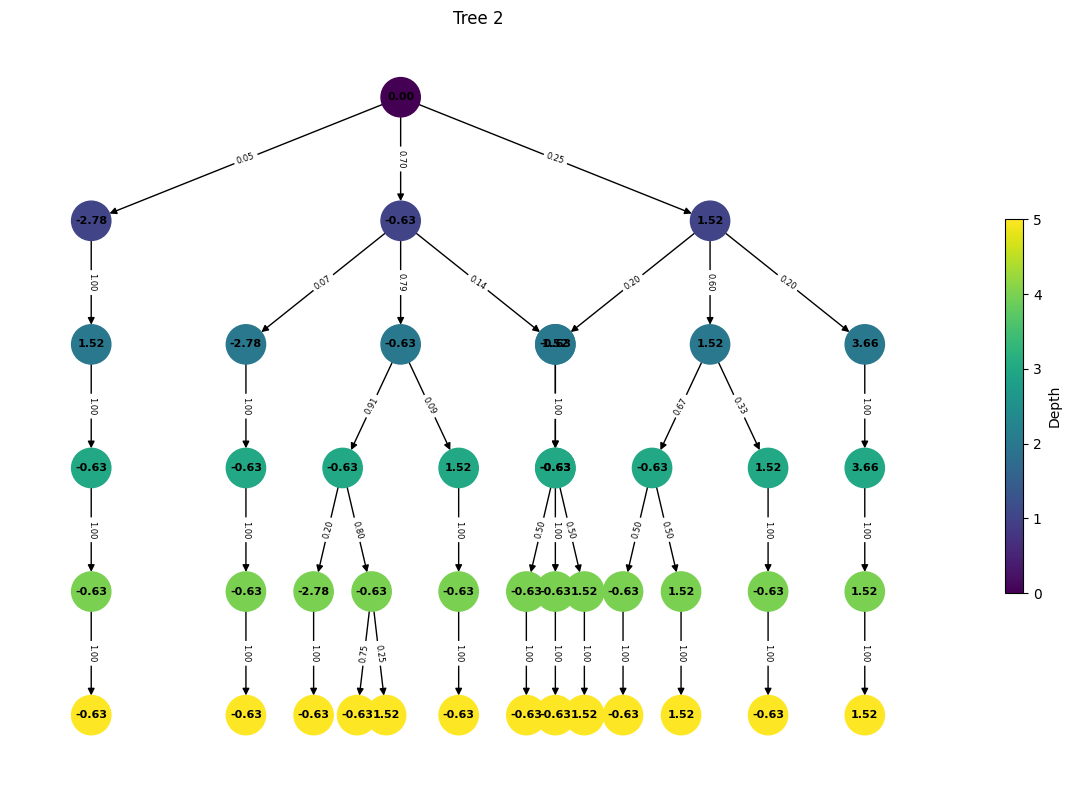

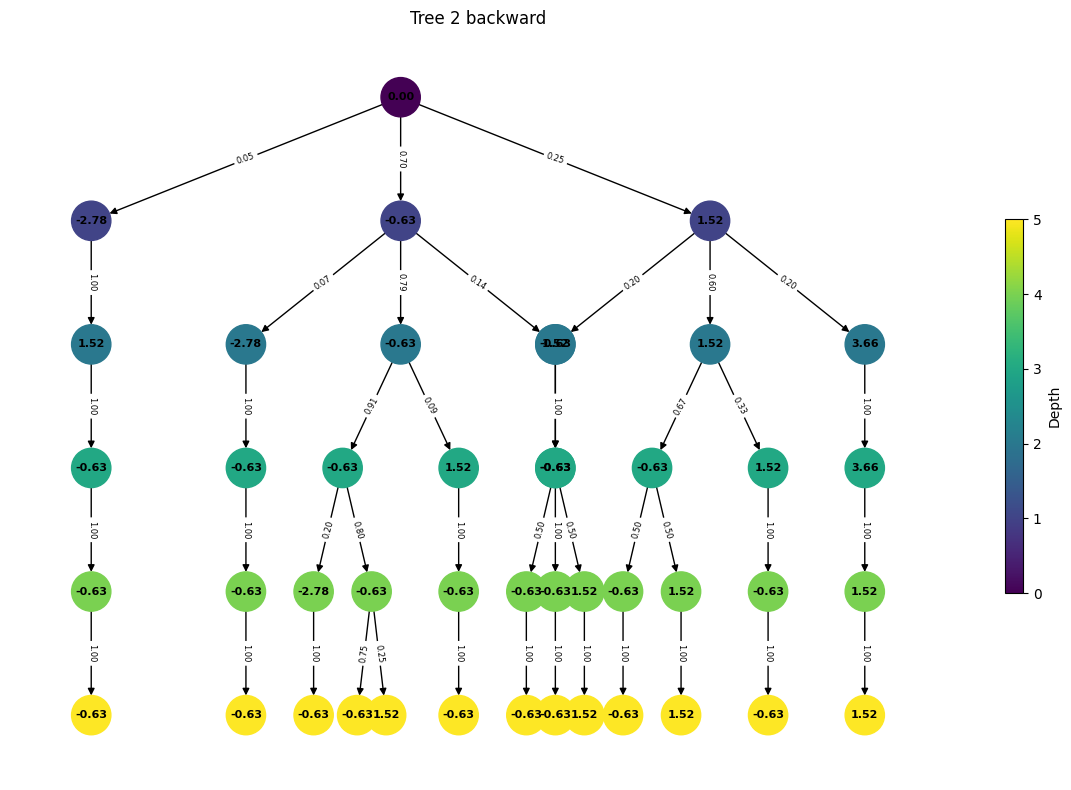

In [8]:
# Define the method and time steps to loop over
method = "grid"

# (Optional) Benchmark distance (if you had one) – here we set it to NaN since no closed form is available.
distance_benchmark = np.nan

# Noise standard deviation used in the two processes
sigma = 1.0
            
T = 6  # number of time steps (assumes t=0 is included)

num_paths = 20
            
# ---------------------------
# Generate non-Markovian sample paths:
# ---------------------------
# Process 1: Averaging Process (update uses the full past)
samplesA = np.zeros((num_paths, T))
for j in range(num_paths):
    samplesA[j, 0] = 0  # initial condition
    for t in range(1, T):
        past_mean = np.mean(samplesA[j, :t])
        samplesA[j, t] = past_mean + np.random.normal(0, sigma)
            
# Process 2: Weighted Noise Sum Process (each step is a weighted sum of past noise)
samplesB = np.zeros((num_paths, T))
for j in range(num_paths):
    # Generate a noise sequence for this sample path
    noise = np.random.normal(0, sigma, T)
    samplesB[j, 0] = 0  # initial condition
    for t in range(1, T):
        weighted_sum = 0
        for s in range(t):
            weight = 1 / (t - s)
            weighted_sum += weight * noise[s]
        samplesB[j, t] = weighted_sum
            
# (If your empirical_grid_measure function expects an extra zero column, you could add one;
# here we assume that the processes already start at zero.)
samplesA_with_zero = samplesA  
samplesB_with_zero = samplesB  

new_sample_pathsA, new_weightsA = empirical_grid_measure(samplesA_with_zero, use_weights=True)
new_sample_pathsB, new_weightsB = empirical_grid_measure(samplesB_with_zero, use_weights=True)
            

tree1 = build_tree_from_paths(new_sample_pathsA, new_weightsA)
tree2 = build_tree_from_paths(new_sample_pathsB, new_weightsB)

tree1_back = build_tree_from_paths_backward(new_sample_pathsA, new_weightsA)
tree2_back = build_tree_from_paths_backward(new_sample_pathsB, new_weightsB)

visualize_tree(tree1, title="Tree 1")
visualize_tree(tree1_back, title="Tree 1 backward")
visualize_tree(tree2, title="Tree 2")
visualize_tree(tree2_back, title="Tree 2 backward")

Method: grid
Time Steps: 6, Method: grid, Run 1/10 for sample size 10...
Sample Size 10, Run 1: Tree Distance = 9.6616, backward_tree Distance = 9.6616, Difference = 0.0000
Sample Size 10, Run 1: Tree Time = 0.0182s, backward_tree Time = 0.0727s, Time Diff = -0.0546s
Time Steps: 6, Method: grid, Run 2/10 for sample size 10...
Sample Size 10, Run 2: Tree Distance = 16.8163, backward_tree Distance = 16.8163, Difference = -0.0000
Sample Size 10, Run 2: Tree Time = 0.0201s, backward_tree Time = 0.0203s, Time Diff = -0.0002s
Time Steps: 6, Method: grid, Run 3/10 for sample size 10...
Sample Size 10, Run 3: Tree Distance = 12.4162, backward_tree Distance = 12.4162, Difference = -0.0000
Sample Size 10, Run 3: Tree Time = 0.0124s, backward_tree Time = 0.0125s, Time Diff = -0.0001s
Time Steps: 6, Method: grid, Run 4/10 for sample size 10...
Sample Size 10, Run 4: Tree Distance = 16.6544, backward_tree Distance = 16.6544, Difference = -0.0000
Sample Size 10, Run 4: Tree Time = 0.0151s, backward_

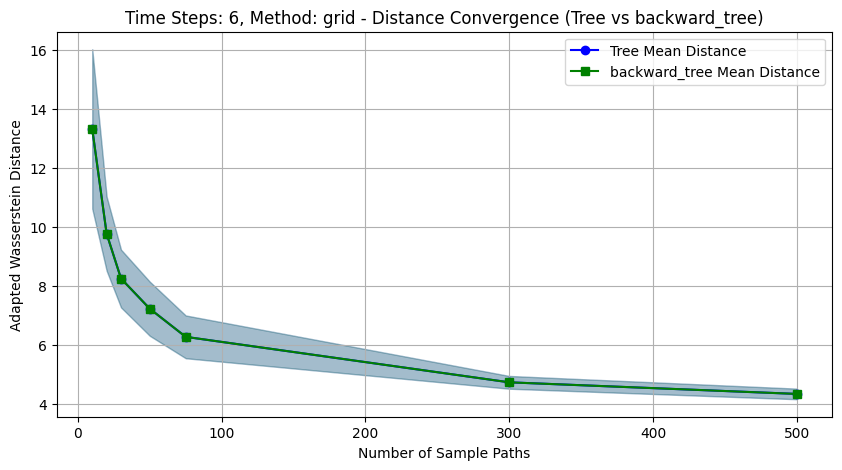

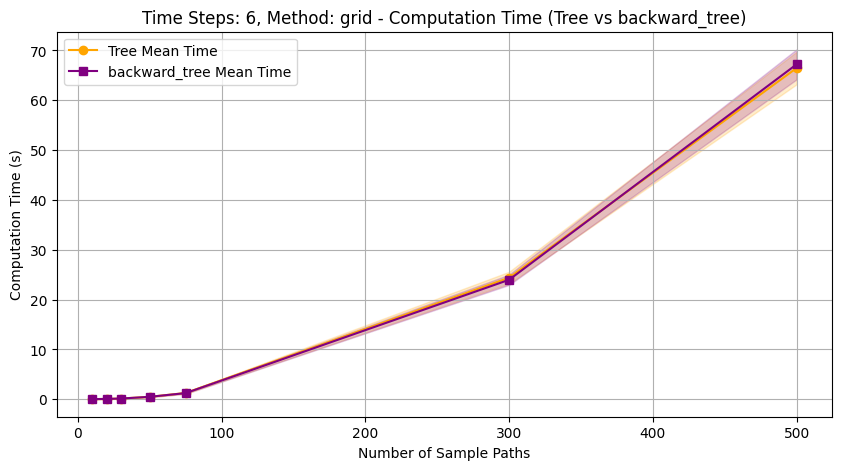

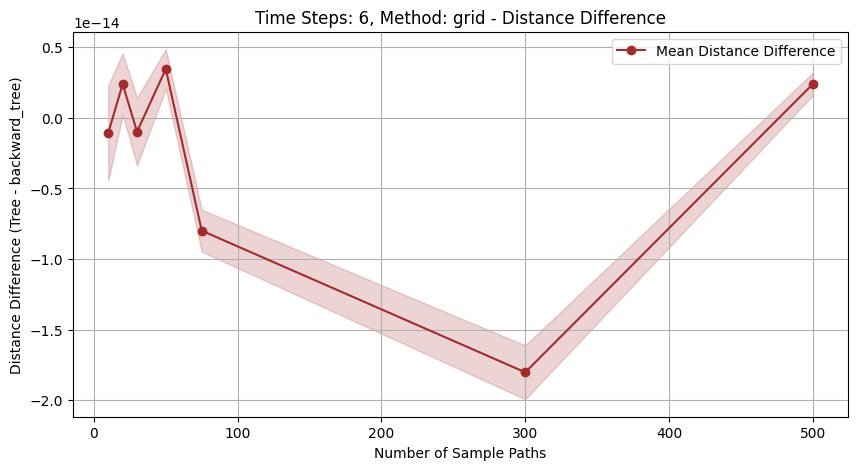

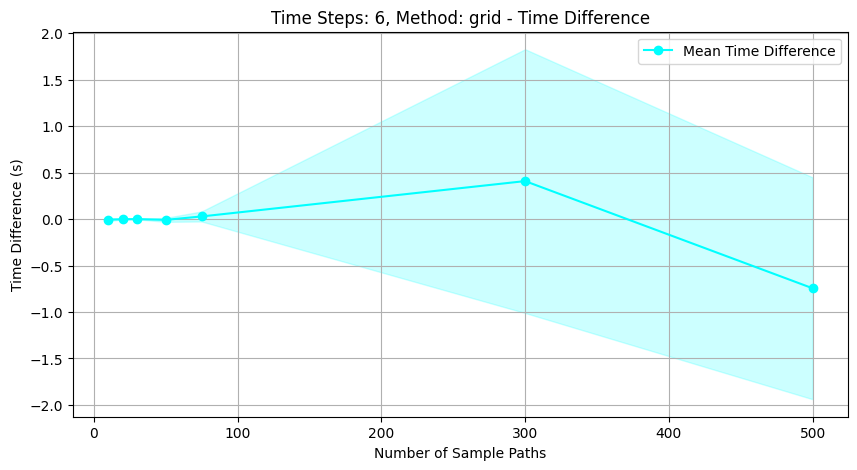

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Define the method and time steps to loop over
method = "grid"
time_steps_list = [6]  # total number of time steps (including t=0)
n_runs = 10

# Define sample path sizes for each time step
sample_sizes = [10, 20, 30, 50, 75, 300, 500]

# Prepare arrays for storing tree and backward_tree results
distances_all_tree = np.zeros((len(sample_sizes), n_runs))
times_all_tree = np.zeros((len(sample_sizes), n_runs))
distances_all_backward_tree = np.zeros((len(sample_sizes), n_runs))
times_all_backward_tree = np.zeros((len(sample_sizes), n_runs))
diff_distance_all = np.zeros((len(sample_sizes), n_runs))
diff_time_all = np.zeros((len(sample_sizes), n_runs))

# (Optional) Benchmark distance (if you had one) – here we set it to NaN since no closed form is available.
distance_benchmark = np.nan

# Noise standard deviation used in the two processes
sigma = 1.0

# Loop over each time step and method combination
for time_steps in time_steps_list:
    print("Method:", method)
    
    # Loop over each sample size and run multiple trials for statistics
    for i, num_paths in enumerate(sample_sizes):
        for run_idx in range(n_runs):
            print(f"Time Steps: {time_steps}, Method: {method}, Run {run_idx+1}/{n_runs} for sample size {num_paths}...")
            
            T = time_steps  # number of time steps (assumes t=0 is included)
            
            # ---------------------------
            # Generate non-Markovian sample paths:
            # ---------------------------
            # Process 1: Averaging Process (update uses the full past)
            samplesA = np.zeros((num_paths, T))
            for j in range(num_paths):
                samplesA[j, 0] = 0  # initial condition
                for t in range(1, T):
                    past_mean = np.mean(samplesA[j, :t])
                    samplesA[j, t] = past_mean + np.random.normal(0, sigma)
            
            # Process 2: Weighted Noise Sum Process (each step is a weighted sum of past noise)
            samplesB = np.zeros((num_paths, T))
            for j in range(num_paths):
                # Generate a noise sequence for this sample path
                noise = np.random.normal(0, sigma, T)
                samplesB[j, 0] = 0  # initial condition
                for t in range(1, T):
                    weighted_sum = 0
                    for s in range(t):
                        weight = 1 / (t - s)
                        weighted_sum += weight * noise[s]
                    samplesB[j, t] = weighted_sum
            
            # (If your empirical_grid_measure function expects an extra zero column, you could add one;
            # here we assume that the processes already start at zero.)
            samplesA_with_zero = samplesA  
            samplesB_with_zero = samplesB  
            
            # ---------------------------
            # Compute the empirical grid measures (paths and weights)
            # ---------------------------
            new_sample_pathsA, new_weightsA = empirical_grid_measure(samplesA_with_zero, use_weights=True)
            new_sample_pathsB, new_weightsB = empirical_grid_measure(samplesB_with_zero, use_weights=True)
            
            # ---------------------------
            # Build tree/backward_tree representations:
            # ---------------------------
            tree1 = build_tree_from_paths(new_sample_pathsA, new_weightsA)
            tree2 = build_tree_from_paths(new_sample_pathsB, new_weightsB)

            tree1_back = build_tree_from_paths_backward(new_sample_pathsA, new_weightsA)
            tree2_back = build_tree_from_paths_backward(new_sample_pathsB, new_weightsB)
            
            
            # ---------------------------
            # Compute nested distance using the tree:
            # ---------------------------
            max_depth_tree = get_depth(tree2)
            start_time_backward_tree = time.time()
            distance_tree = compute_nested_distance(
                tree1, tree2, max_depth_tree, 
                method="solver_lp_pot", 
                return_matrix=False, 
                lambda_reg=0, 
                power=2
            )
            elapsed_time_backward_tree = time.time() - start_time_backward_tree
            
            # ---------------------------
            # Compute nested distance using the backward_tree:
            # ---------------------------
            max_depth_tree = get_depth(tree1_back)
            start_time_tree = time.time()
            distance_backward_tree = compute_nested_distance(
                tree1_back, tree2_back, max_depth_tree, 
                method="solver_lp_pot", 
                return_matrix=False, 
                lambda_reg=0, 
                power=2
            )
            elapsed_time_tree = time.time() - start_time_tree
            
            # (Optional) Adjust the computed distances by subtracting any constant (here, 0)
            distance_tree -= (0 - 0) ** 2
            distance_backward_tree -= (0 - 0) ** 2
            
            # Store the computed distances and computation times:
            distances_all_tree[i, run_idx] = distance_tree
            times_all_tree[i, run_idx] = elapsed_time_tree
            distances_all_backward_tree[i, run_idx] = distance_backward_tree
            times_all_backward_tree[i, run_idx] = elapsed_time_backward_tree
            
            # Also store the differences (tree - backward_tree)
            diff_distance_all[i, run_idx] = distance_tree - distance_backward_tree
            diff_time_all[i, run_idx] = elapsed_time_tree - elapsed_time_backward_tree
            
            print(f"Sample Size {num_paths}, Run {run_idx+1}: Tree Distance = {distance_tree:.4f}, backward_tree Distance = {distance_backward_tree:.4f}, Difference = {distance_tree - distance_backward_tree:.4f}")
            print(f"Sample Size {num_paths}, Run {run_idx+1}: Tree Time = {elapsed_time_tree:.4f}s, backward_tree Time = {elapsed_time_backward_tree:.4f}s, Time Diff = {elapsed_time_tree - elapsed_time_backward_tree:.4f}s")

    # ---------------------------
    # Compute statistics over runs:
    # ---------------------------
    # Tree statistics:
    distances_tree_mean = distances_all_tree.mean(axis=1)
    distances_tree_std = distances_all_tree.std(axis=1)
    times_tree_mean = times_all_tree.mean(axis=1)
    times_tree_std = times_all_tree.std(axis=1)
    # backward_tree statistics:
    distances_backward_tree_mean = distances_all_backward_tree.mean(axis=1)
    distances_backward_tree_std = distances_all_backward_tree.std(axis=1)
    times_backward_tree_mean = times_all_backward_tree.mean(axis=1)
    times_backward_tree_std = times_all_backward_tree.std(axis=1)
    # Difference statistics:
    diff_distance_mean = diff_distance_all.mean(axis=1)
    diff_distance_std = diff_distance_all.std(axis=1)
    diff_time_mean = diff_time_all.mean(axis=1)
    diff_time_std = diff_time_all.std(axis=1)
    
    # ---------------------------
    # PLOTTING
    # ---------------------------
    # Plot 1: Distance convergence for Tree vs. backward_tree
    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, distances_tree_mean, marker="o", color="blue", label="Tree Mean Distance")
    plt.plot(sample_sizes, distances_backward_tree_mean, marker="s", color="green", label="backward_tree Mean Distance")
    plt.fill_between(sample_sizes, distances_tree_mean - distances_tree_std, distances_tree_mean + distances_tree_std, color="blue", alpha=0.2)
    plt.fill_between(sample_sizes, distances_backward_tree_mean - distances_backward_tree_std, distances_backward_tree_mean + distances_backward_tree_std, color="green", alpha=0.2)
    if not np.isnan(distance_benchmark):
        plt.axhline(y=distance_benchmark, color="red", linestyle="--", label="Benchmark Distance")
    plt.xlabel("Number of Sample Paths")
    plt.ylabel("Adapted Wasserstein Distance")
    plt.title(f"Time Steps: {time_steps}, Method: {method} - Distance Convergence (Tree vs backward_tree)")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot 2: Computation Time for Tree vs. backward_tree
    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, times_tree_mean, marker="o", color="orange", label="Tree Mean Time")
    plt.plot(sample_sizes, times_backward_tree_mean, marker="s", color="purple", label="backward_tree Mean Time")
    plt.fill_between(sample_sizes, times_tree_mean - times_tree_std, times_tree_mean + times_tree_std, color="orange", alpha=0.2)
    plt.fill_between(sample_sizes, times_backward_tree_mean - times_backward_tree_std, times_backward_tree_mean + times_backward_tree_std, color="purple", alpha=0.2)
    plt.xlabel("Number of Sample Paths")
    plt.ylabel("Computation Time (s)")
    plt.title(f"Time Steps: {time_steps}, Method: {method} - Computation Time (Tree vs backward_tree)")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot 3: Difference in Distance (Tree - backward_tree)
    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, diff_distance_mean, marker="o", color="brown", label="Mean Distance Difference")
    plt.fill_between(sample_sizes, diff_distance_mean - diff_distance_std, diff_distance_mean + diff_distance_std, color="brown", alpha=0.2)
    plt.xlabel("Number of Sample Paths")
    plt.ylabel("Distance Difference (Tree - backward_tree)")
    plt.title(f"Time Steps: {time_steps}, Method: {method} - Distance Difference")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Plot 4: Difference in Computation Time (Tree - backward_tree)
    plt.figure(figsize=(10, 5))
    plt.plot(sample_sizes, diff_time_mean, marker="o", color="cyan", label="Mean Time Difference")
    plt.fill_between(sample_sizes, diff_time_mean - diff_time_std, diff_time_mean + diff_time_std, color="cyan", alpha=0.2)
    plt.xlabel("Number of Sample Paths")
    plt.ylabel("Time Difference (s)")
    plt.title(f"Time Steps: {time_steps}, Method: {method} - Time Difference")
    plt.legend()
    plt.grid()
    plt.show()